# 신용카드 연체 사용자 예측

신규 발급 증가에 따른 연체자수 증가

카드 대금 회수 지연 -> 자금 유동성 문제

In [100]:
import pandas as pd

df = pd.read_csv('creditcard_fault.csv')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [99]:
df.gender = df.gender.map(lambda x: 1 if x == 'M' else 0)
df.car = df.car.map(lambda x: 1 if x == 'Y' else 0)
df.reality = df.reality.map(lambda x: 1 if x == 'Y' else 0)

AttributeError: 'NoneType' object has no attribute 'gender'

In [101]:
df = df.drop(['FLAG_MOBIL', 'index'], axis = 1)
df

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [65]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [66]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


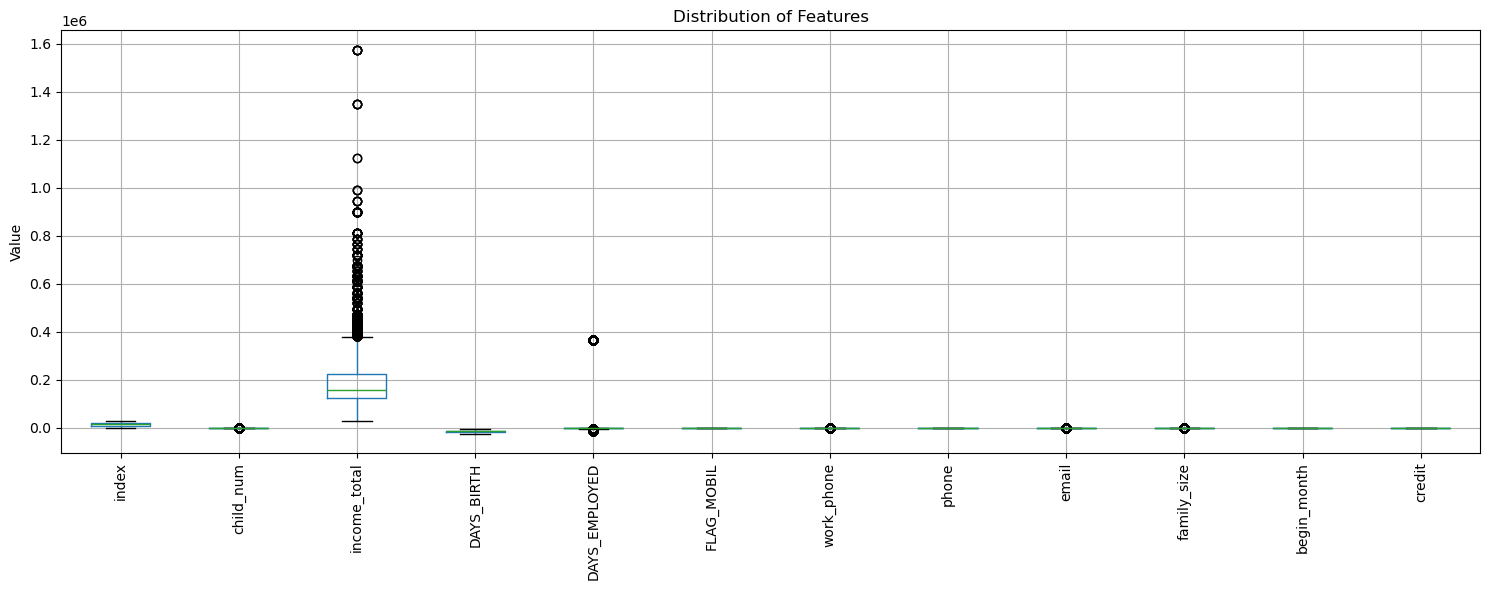

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Distribution of Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [88]:
df['credit'].value_counts(normalize=True)

credit
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: proportion, dtype: float64

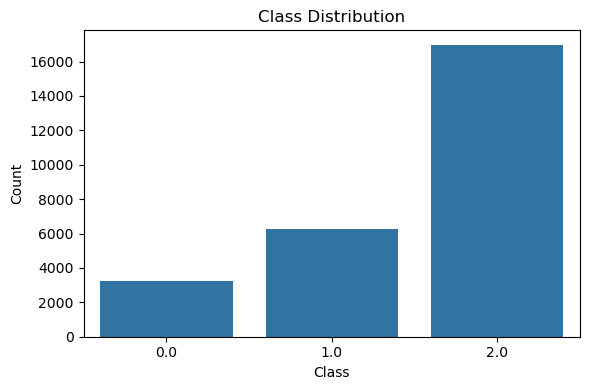

In [89]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='credit', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

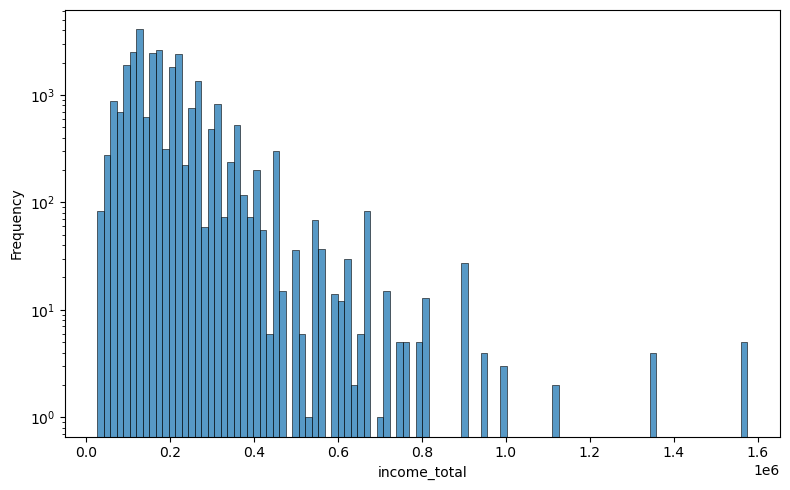

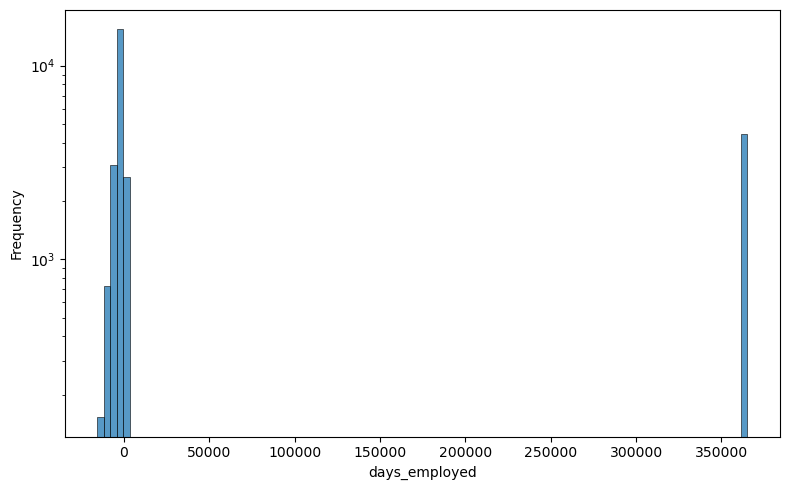

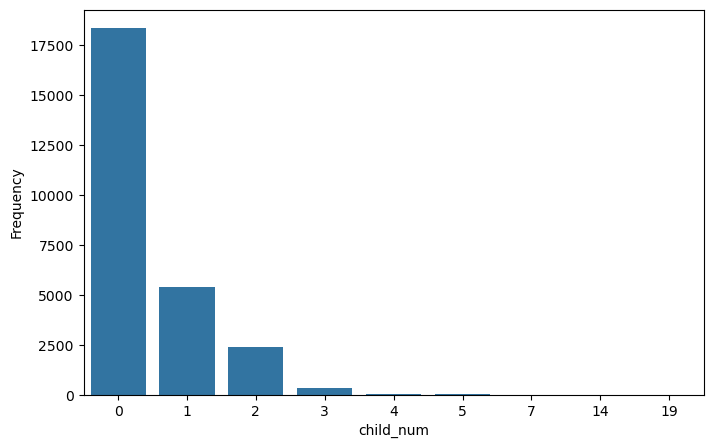

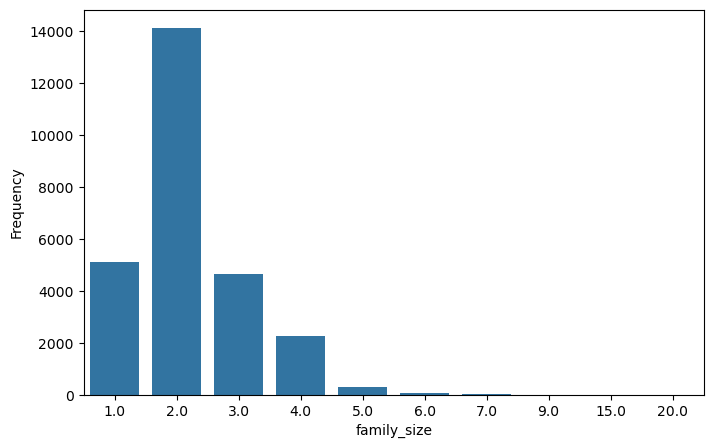

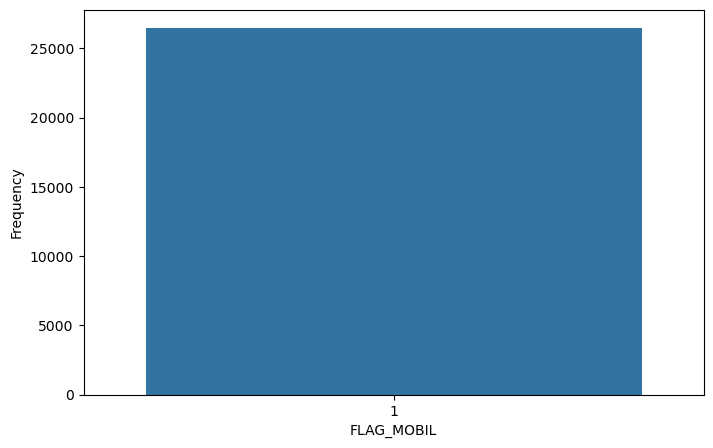

In [91]:
# income_total
plt.figure(figsize=(8, 5))
sns.histplot(df['income_total'], bins=100, kde=False)
plt.xlabel('income_total')
plt.ylabel('Frequency')
plt.yscale('log')
plt.tight_layout()
plt.show()

# days_employed
plt.figure(figsize=(8, 5))
sns.histplot(df['DAYS_EMPLOYED'], bins=100, kde=False)
plt.xlabel('days_employed')
plt.ylabel('Frequency')
plt.yscale('log')
plt.tight_layout()
plt.show()

# child_num
plt.figure(figsize=(8, 5))
sns.countplot(x='child_num', data=df)
plt.xlabel('child_num')
plt.ylabel('Frequency')
plt.show()

# family_size
plt.figure(figsize=(8, 5))
sns.countplot(x='family_size', data=df)
plt.xlabel('family_size')
plt.ylabel('Frequency')
plt.show()

# FLAG_MOBIL
plt.figure(figsize=(8, 5))
sns.countplot(x='FLAG_MOBIL', data=df)
plt.xlabel('FLAG_MOBIL')
plt.ylabel('Frequency')
plt.show()

In [79]:
print(df['family_size'][df['family_size'] > 7])

8462     15.0
9021     15.0
10731    20.0
25313     9.0
25390    15.0
25638     9.0
Name: family_size, dtype: float64


In [80]:
print(df['child_num'][df['child_num'] > 5])

8462     14
9021     14
10731    19
25313     7
25390    14
25638     7
Name: child_num, dtype: int64


In [102]:
df = df.drop(df[df['family_size'] > 7].index)

In [115]:
df.DAYS_EMPLOYED

0         863
1        2421
2         967
3        2065
4        2059
         ... 
26452    2138
26453    1836
26454    2115
26455    3444
26456    2791
Name: DAYS_EMPLOYED, Length: 26453, dtype: int64

Top 10 Features Correlated with Class:
credit           1.000000
email            0.014862
income_total     0.008561
family_size      0.006389
phone            0.003382
child_num        0.001630
work_phone      -0.003237
DAYS_EMPLOYED   -0.003730
DAYS_BIRTH      -0.025212
begin_month     -0.147486
Name: credit, dtype: float64


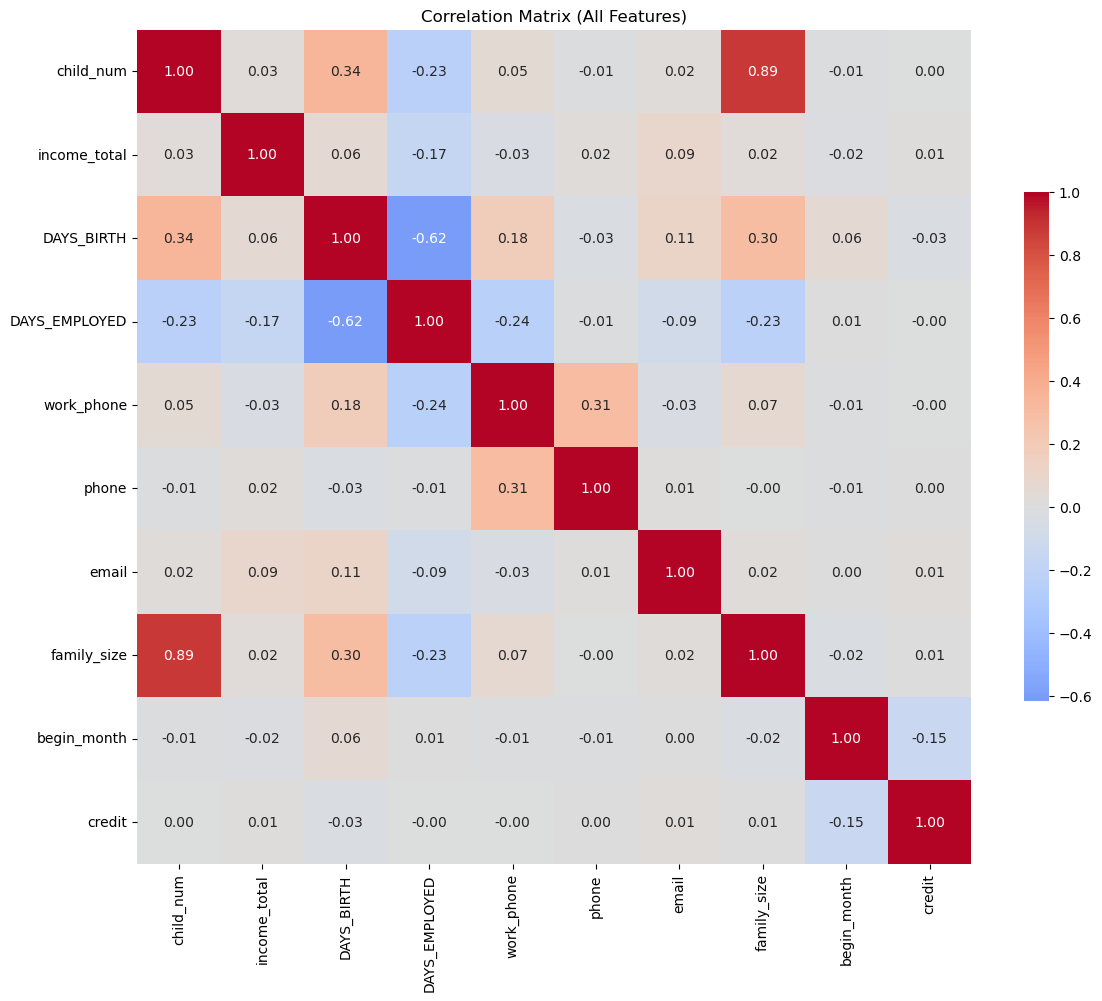

In [105]:
corr_matrix = df.corr(numeric_only=True)

# Class와 가장 높은 상관관계 변수 출력
class_corr = corr_matrix["credit"].sort_values(ascending=False)
print("Top 10 Features Correlated with Class:")
print(class_corr.head(10))

# 전체 상관행렬 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.6}, annot=True, fmt=".2f")
plt.title("Correlation Matrix (All Features)")
plt.tight_layout()
plt.show()


# 전처리

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('creditcard_fault.csv')

encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)

scaler = StandardScaler()
df[['scaled_income_total']] = scaler.fit_transform(df[['income_total']])

df.drop(['income_total'], axis=1, inplace=True)
df.drop(df[df['family_size'] > 7].index, inplace=True)
df.drop('FLAG_MOBIL',axis = 1, inplace=True)

X = df.drop(['credit'], axis=1)
y = df['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Fraud ratio in train set:", y_train.mean())
print("Fraud ratio in test set:", y_test.mean())

Train set shape: (21162, 18)
Test set shape: (5291, 18)
Fraud ratio in train set: 1.5194688592760608
Fraud ratio in test set: 1.5195615195615195


# 모델링 및 평가

In [120]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(10, random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# SMOTE 적용
smote = SMOTE(k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 스케일링 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 모델별 학습 및 평가
for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 결과 출력
    print(f"\n {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 


 Logistic Regression
[[   0   14  630]
 [   0   30 1224]
 [   0   55 3338]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       644
           1     0.3030    0.0239    0.0443      1254
           2     0.6429    0.9838    0.7776      3393

    accuracy                         0.6366      5291
   macro avg     0.3153    0.3359    0.2740      5291
weighted avg     0.4841    0.6366    0.5092      5291


 Random Forest
[[ 138  123  383]
 [  67  545  642]
 [ 119  310 2964]]
              precision    recall  f1-score   support

           0     0.4259    0.2143    0.2851       644
           1     0.5573    0.4346    0.4884      1254
           2     0.7430    0.8736    0.8030      3393

    accuracy                         0.6893      5291
   macro avg     0.5754    0.5075    0.5255      5291
weighted avg     0.6604    0.6893    0.6654      5291


 XGBoost
[[  54   87  503]
 [  22  365  867]
 [  29   76 3288]]
              precision  

# 결과 분석

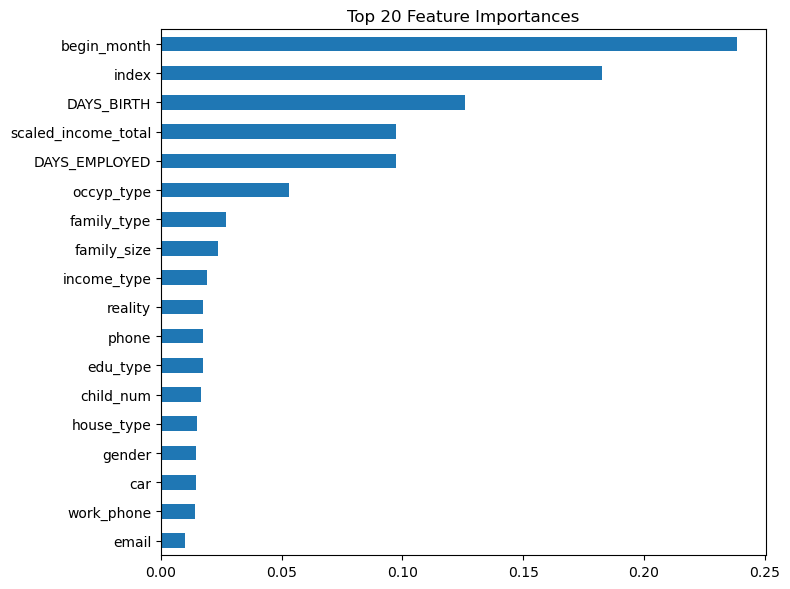

In [ ]:
# Feature Importance 시각화
importances = pd.Series(models["Random Forest"].feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8, 6), title="Top 20 Feature Importances")
plt.tight_layout()
plt.show()

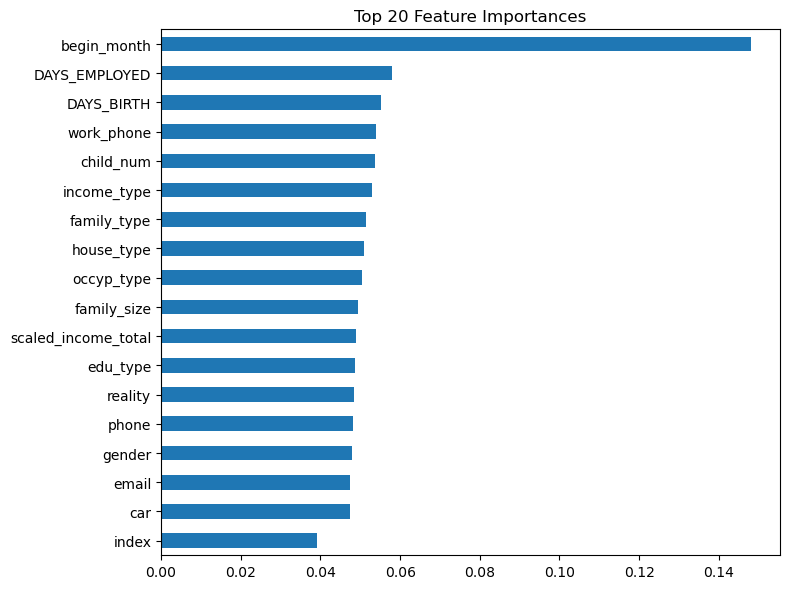

In [122]:
# Feature Importance 시각화
importances = pd.Series(models["XGBoost"].feature_importances_, index=X.columns)
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(8, 6), title="Top 20 Feature Importances")
plt.tight_layout()
plt.show()